In [1]:
import numpy as np#you usually need numpy

#---these are for plots---#
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=14
plt.rcParams['mathtext.fontset']='stix'
#-------------------------#

In [2]:
#load the module

from os import  getcwd, chdir

curDir=getcwd()#this is the directory of the notebook
chdir('../../src')#go to the direcory that interfacePy is located
from interfacePy.Axion import Axion 
from interfacePy.Cosmo import Hubble

chdir(curDir)#return to the directory of the notebook

In [3]:
theta_i, fa=0.94435, 1e12
# theta_i, fa=np.pi, 1e12
# theta_i, fa=1e-3, 1e5

umax=500
TSTOP=1e-4
ratio_ini=1e3

N_convergence_max, convergence_lim=5, 1e-2 #this is fine, but you can experiment a bit. 

#radiation dominated example
inputFile="../InputExamples/RDinput.dat" 

# non-standard cosmological example. 
# the NSC parameters (using the notation of 2012.07202) are:
# T_end=1e-1 (GeV), c=2, T_ini=1e7 (GeV), and r=1e-3
# inputFile="../InputExamples/NSCinput.dat" 

In [4]:
# options for the solver
# These variables are optional. Yoou can use the Axion class without them.
initial_step_size=1e-2; #initial step the solver takes. 
minimum_step_size=1e-8; #This limits the sepsize to an upper limit. 
maximum_step_size=1e-3; #This limits the sepsize to a lower limit.
absolute_tolerance=1e-8; #absolute tolerance of the RK solver
relative_tolerance=1e-8; #relative tolerance of the RK solver
beta=0.9; #controls how agreesive the adaptation is. Generally, it should be around but less than 1.

#The stepsize does not increase more than fac_max, and less than fac_min. 
#This ensures a better stability. Ideally, fac_max=inf and fac_min=0, but in reality one must 
#tweak them in order to avoid instabilities.
fac_max=1.2; 
fac_min=0.8;
maximum_No_steps=int(1e7); #maximum steps the solver can take Quits if this number is reached even if integration is not finished.


# Axion instance
ax=Axion(theta_i, fa, umax, TSTOP, ratio_ini, N_convergence_max, convergence_lim, inputFile,
        initial_step_size,minimum_step_size, maximum_step_size, absolute_tolerance, 
        relative_tolerance, beta, fac_max, fac_min, maximum_No_steps)


In [5]:
# Axion instance
# you can always run Axion with the default parameters for the solver
# ax=Axion(theta_i, fa, umax, TSTOP, ratio_ini, N_convergence_max, convergence_lim, inputFile)

In [6]:
# solve the EOM (this only gives you the relic, T_osc, theta_osc, and a_osc)
ax.solve()

0.03876686096191406

In [7]:
ax.relic, ax.T_osc, ax.theta_osc

(0.11911106289668437, 0.9799135634856135, 0.8977599255732766)

In [8]:
ax.getPeaks()#this gives you the peaks of the oscillation
ax.getPoints()#this gives you all the points of integration

<IPython.core.display.Javascript object>


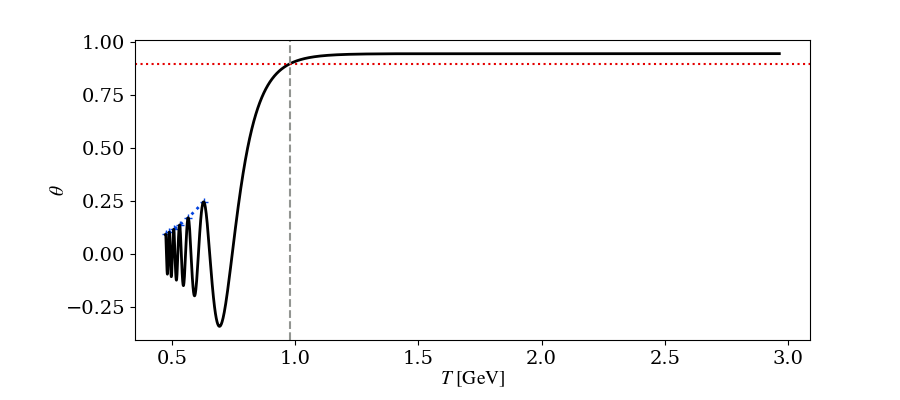

In [9]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    #this plot shows the peaks of the oscillation
    sub.plot(ax.T_peak,ax.theta_peak,linestyle=':',marker='+',color='xkcd:blue',linewidth=2)

    #this plot shows all the points
    sub.plot(ax.T,ax.theta,linestyle='-',linewidth=2,alpha=1,c='xkcd:black')

    
    sub.set_yscale('linear')
    sub.set_xscale('linear')
    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'$\theta$')
    sub.yaxis.set_label_coords(-0.1,0.5) 

    sub.axhline(ax.theta_osc,linestyle=':',color='xkcd:red',linewidth=1.5)
    sub.axvline(ax.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)
   
    fig.show()

<IPython.core.display.Javascript object>


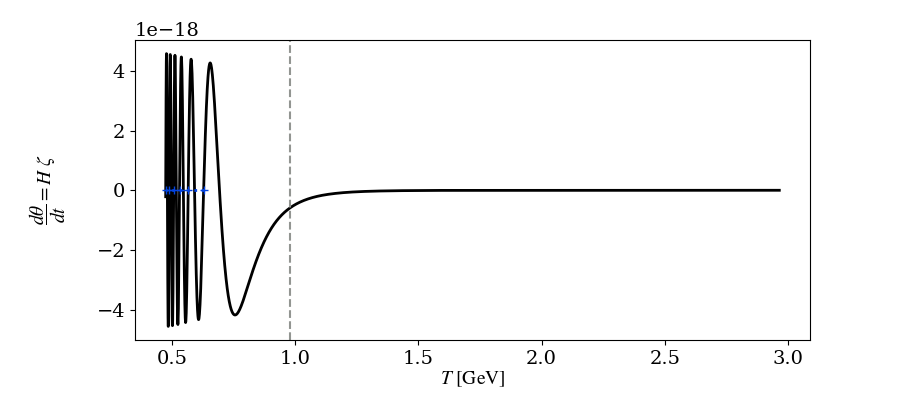

In [10]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    _H_=np.array([Hubble(T) for T in ax.T])
    sub.plot(ax.T,_H_*ax.zeta,linestyle='-',linewidth=2,alpha=1,c='xkcd:black')
    _H_=np.array([Hubble(T) for T in ax.T_peak])
    sub.plot(ax.T_peak,_H_*ax.zeta_peak,linestyle=':',marker='+',color='xkcd:blue',linewidth=2)
    
    sub.set_yscale('linear')
    sub.set_xscale('linear')
    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'$\dfrac{d \theta}{ dt } = H \ \zeta $')
    sub.yaxis.set_label_coords(-0.1,0.5) 

    sub.axvline(ax.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)

    fig.show()

<IPython.core.display.Javascript object>


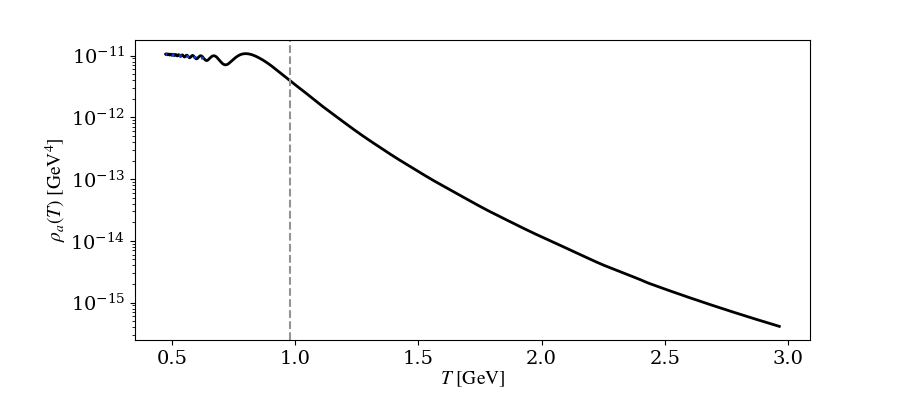

In [11]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    sub.plot(ax.T,ax.rho_axion,linestyle='-',linewidth=2,alpha=1,c='xkcd:black')
    sub.plot(ax.T_peak,ax.rho_axion_peak,linestyle=':',linewidth=2,alpha=1,c='xkcd:blue')

    sub.set_yscale('log')
    sub.set_xscale('linear')
    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'$\rho_{a}(T) ~[{\rm GeV}^{4}]$')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    
    
    sub.axvline(ax.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)
    
    fig.show()

In [12]:
#run the destructor
del ax